<a href="https://colab.research.google.com/github/jclawson0602/Project4_Group2/blob/main/Extra_Model_of_Module_21Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 1.8 MB/s eta 0:00:00


In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn as skl

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
# use df = df.drop('Column", axis=1) or  newdf = df.drop(columns=["name","name"])
application_df = application_df.drop(columns=["EIN", "NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [7]:
clean_application_df = application_df["APPLICATION_TYPE"].value_counts()
clean_application_df

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [8]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(clean_application_df[clean_application_df <500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement/binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
clean_application_df = application_df["CLASSIFICATION"].value_counts()
clean_application_df

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [10]:
# You may find it helpful to look at CLASSIFICATION value counts >1
application_df['CLASSIFICATION'].value_counts().loc[lambda x : x > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [11]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(application_df['CLASSIFICATION'].value_counts()[application_df['CLASSIFICATION'].value_counts() < 1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [12]:
application_df = application_df.drop(columns=["ASK_AMT"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,1


In [13]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df = pd.get_dummies(application_df, dtype=int)
application_df.head()

,STATUS,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(columns='IS_SUCCESSFUL').values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [16]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=80,
        step=2), activation=activation, input_dim=len(X_test_scaled[0])))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 3, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=3,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [17]:
 # Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [ ]:
 # Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 29 Complete [00h 01m 24s]
val_accuracy: 0.7295626997947693

Best val_accuracy So Far: 0.7337609529495239
Total elapsed time: 00h 12m 42s

Search: Running Trial #30

Value             |Best Value So Far |Hyperparameter
relu              |sigmoid           |activation
39                |73                |first_units
5                 |4                 |num_layers
9                 |3                 |units_0
7                 |5                 |units_1
5                 |7                 |units_2
9                 |5                 |units_3
9                 |9                 |units_4
3                 |7                 |units_5
20                |7                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
0                 |1                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/20
804/804 [==============================] - 5s 4ms/step - loss: 0.5869 - accuracy: 0.7092 - val_loss: 0.5634 - val_accuracy: 0.728

In [ ]:
 # Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'sigmoid',
 'first_units': 5,
 'num_layers': 3,
 'units_0': 7,
 'units_1': 1,
 'units_2': 9,
 'units_3': 7,
 'units_4': 3,
 'units_5': 9,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0039'}

In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 344       
                                                                 
 dense_8 (Dense)             (None, 5)                 45        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 395 (1.54 KB)
Trainable params: 395 (1.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6054 - accuracy: 0.6999
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5651 - accuracy: 0.7253
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5585 - accuracy: 0.7266
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5562 - accuracy: 0.7278
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5547 - accuracy: 0.7271
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5538 - accuracy: 0.7282
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5526 - accuracy: 0.7297
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5517 - accuracy: 0.7298
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5511 - accuracy: 0.7305
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5506 - accura

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5546 - accuracy: 0.7315 - 444ms/epoch - 2ms/step
Loss: 0.5546022057533264, Accuracy: 0.7315452098846436


In [ ]:
!pwd

/content


<Axes: >

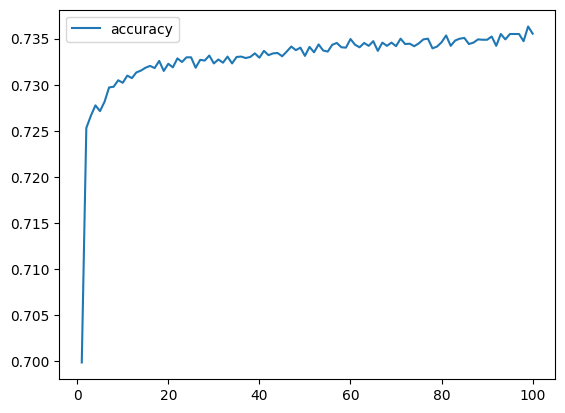

In [ ]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [ ]:

# Export our model to HDF5 file
nn.save('/content/drive/MyDrive/AlphabetCharity1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
nn.save('/content/drive/MyDrive/my_model1.h5')

In [ ]:
#2 Attempt: Adding a hidden layer

number_input_features = len(X_train[0])
hidden_nodes_layer1 =  80
hidden_nodes_layer2 = 40
hidden_nodes_layer3 = 10
nn_model = tf.keras.models.Sequential()

In [ ]:
#First layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
             input_dim=number_input_features, activation="tanh"))

#Second layer
nn_model.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, activation="relu"))

#Third layer
nn_model.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer3, activation="relu"))

#Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

#Check the structure of the model
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 80)                3440      
                                                                 
 dense_15 (Dense)            (None, 40)                3240      
                                                                 
 dense_16 (Dense)            (None, 10)                410       
                                                                 
 dense_17 (Dense)            (None, 1)                 11        
                                                                 
Total params: 7101 (27.74 KB)
Trainable params: 7101 (27.74 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5672 - accuracy: 0.7209
Epoch 2/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5543 - accuracy: 0.7290
Epoch 3/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5516 - accuracy: 0.7309
Epoch 4/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5500 - accuracy: 0.7318
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5491 - accuracy: 0.7322
Epoch 6/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5481 - accuracy: 0.7321
Epoch 7/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5474 - accuracy: 0.7326
Epoch 8/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5471 - accuracy: 0.7345
Epoch 9/100
804/804 [==============================] - 3s 4ms/step - loss: 0.5470 - accuracy: 0.7327
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5459 - accura

In [ ]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [ ]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization2.h5')

In [ ]:
nn.save('AlphabetCharity2.h5')

In [ ]:
# 3rd Attempt
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 8

nn_model = tf.keras.models.Sequential()

#First layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1,
             input_dim=number_input_features, activation="tanh"))

#Second layer
nn_model.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2, activation="relu"))

#Third layer
#nn_model.add(tf.keras.layers.Dense(
    #units=hidden_nodes_layer3, activation="relu"))

#Output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu"))

#Check the structure of the model
nn_model.summary()

In [ ]:
# Compile the model
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

In [ ]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [ ]:
# plotting the accuracy
history_df = pd.DataFrame(fit_model.history, index = range(1, len(fit_model.history['loss'])+1))
history_df.plot(y = 'accuracy')

In [ ]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity_Optimization3.h5')